<a href="https://colab.research.google.com/github/koseki3104/biginner_practice202506/blob/main/%E5%8C%BB%E7%99%82%E8%B2%BB%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/SIGNATE/【2025.06】医療保険の費用帯予測')


In [4]:
import pandas as pd
test = pd.read_csv("test.csv")
train = pd.read_csv('train.csv')

In [9]:
#基本情報
print(train.info())
print(train.isnull().sum())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1600 non-null   int64  
 1   age       1600 non-null   int64  
 2   sex       1600 non-null   object 
 3   bmi       1600 non-null   float64
 4   children  1600 non-null   int64  
 5   smoker    1600 non-null   object 
 6   region    1600 non-null   object 
 7   charges   1600 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 100.1+ KB
None
id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               id          age          bmi     children      charges
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000
mean   1007.86250    38.985000    32.424376     1.014375     0.306250
std     575.26841    13.555012     5.766915     1.259031     0.628656
min       0.00000    18.000000

In [8]:
#相関行列
train_df = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = train_df.corr()
print(correlation_matrix)

                id       age       bmi  children   charges
id        1.000000  0.005803  0.039221  0.012440  0.013463
age       0.005803  1.000000  0.019885  0.011519  0.102112
bmi       0.039221  0.019885  1.000000  0.083677  0.171282
children  0.012440  0.011519  0.083677  1.000000  0.026830
charges   0.013463  0.102112  0.171282  0.026830  1.000000


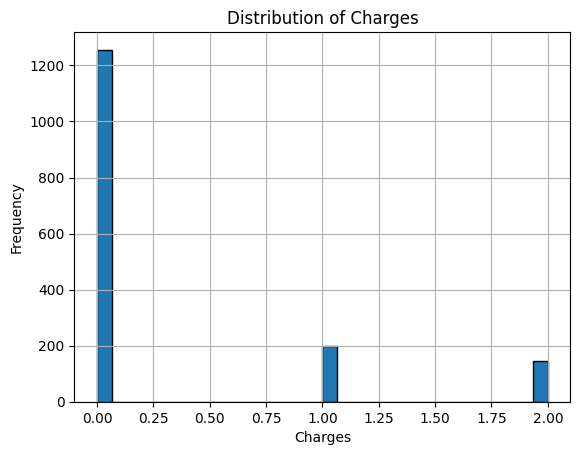

In [9]:
import matplotlib.pyplot as plt

# ヒストグラムの描画
plt.hist(train['charges'], bins=30, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーのインスタンスを作成
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

# 各列を数値に変換
train['sex'] = le_sex.fit_transform(train['sex'])
train['smoker'] = le_smoker.fit_transform(train['smoker'])
train['region'] = le_region.fit_transform(train['region'])
test['sex'] = le_sex.fit_transform(test['sex'])
test['smoker'] = le_smoker.fit_transform(test['smoker'])
test['region'] = le_region.fit_transform(test['region'])

# 説明変数と目的変数を分ける
X = train.drop(columns=['charges','id'])
y = train['charges']

X_test = test.drop(columns=['id'])

# データ分割
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル学習
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

y_pred_all = model.predict(X_test)

# 提出用DataFrameを train の id順に作成
sample = pd.read_csv("sample_submit.csv")

# B列の列名を取得
sample['charges'] = y_pred_all

# ファイル保存（ヘッダーなし）
sample.to_csv('sample_submit2.csv', index=False, header=False)